In [1]:
import sklearn
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from pprint import pprint

# Fetch dataset

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
pprint(mnist["DESCR"])

('**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n'
 '**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date '
 'unknown  \n'
 '**Please cite**:  \n'
 '\n'
 'The MNIST database of handwritten digits with 784 features, raw data '
 'available at: http://yann.lecun.com/exdb/mnist/. It can be split in a '
 'training set of the first 60,000 examples, and a test set of 10,000 '
 'examples  \n'
 '\n'
 'It is a subset of a larger set available from NIST. The digits have been '
 'size-normalized and centered in a fixed-size image. It is a good database '
 'for people who want to try learning techniques and pattern recognition '
 'methods on real-world data while spending minimal efforts on preprocessing '
 'and formatting. The original black and white (bilevel) images from NIST were '
 'size normalized to fit in a 20x20 pixel box while preserving their aspect '
 'ratio. The resulting images contain grey levels as a result of the '
 'anti-aliasing technique used

In [4]:
len(mnist["data"])

70000

# Separate Train and Test set

As said in the `DESCR` key, there are already 60,000 samples for training and 10,000 for testing.

In [5]:
data = mnist["data"]
targets = mnist["target"]

In [6]:
train_set, train_targets = data[:60_000], targets[:60_000]
test_set, test_targets = data[60_000:], targets[60_000:]

In [7]:
len(train_set), len(test_set), len(train_targets), len(test_targets)

(60000, 10000, 60000, 10000)

# Inspecting the dataset

In [8]:
def plot_digit(digit: np.ndarray, target: str) -> go.Figure:
    fig = px.imshow(digit, color_continuous_scale="gray_r", title=f"Target: {target}")

    fig.update_layout(
        width=400,
        height=400,
        margin=dict(l=0, r=0, b=0, t=40),
        coloraxis_showscale=False,
    )
    fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
    fig.show()

In [12]:
FIGURE_SHAPE = (28, 28)

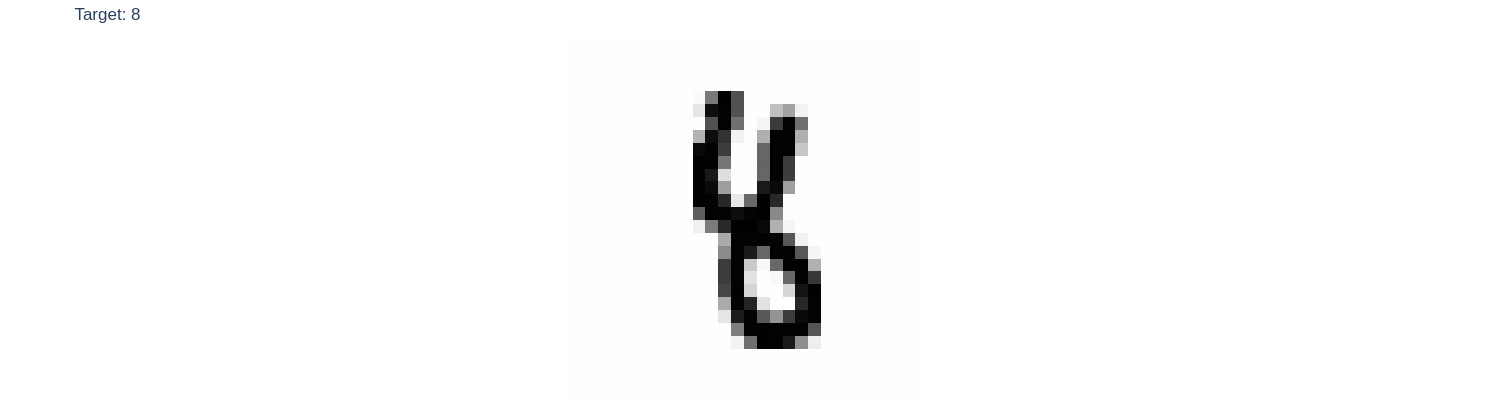

In [13]:
digit = train_set[7_000].reshape(FIGURE_SHAPE)
digit_target = train_targets[7_000]

plot_digit(digit, digit_target)

In [59]:
def plot_grid_of_digits(
    n_rows: int, n_cols: int, digits: np.ndarray, targets: list[str]
) -> go.Figure:
    from plotly.subplots import make_subplots

    fig = make_subplots(
        rows=n_rows,
        cols=n_cols,
    )
    c = 0
    for row in range(1, n_rows+1):
        for col in range(1, n_cols+1):
            fig.add_trace(
                go.Image(
                    z=digits[c]
                ),
                row,
                col,
            )
            c += 1
    
    fig.update_layout(
        margin=dict(l=0, r=0, b=0, t=40),
        coloraxis_showscale=False,
    )
    fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
    fig.show()

In [58]:
random_nums = [np.random.randint(59_999) for i in range(25)]
random_digits = [train_set[i].reshape(FIGURE_SHAPE) for i in random_nums]
random_digits_targets = [train_targets[i] for i in random_nums]

plot_grid_of_digits(5, 5, random_digits, random_digits_targets)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
